In [15]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

# Load dataset
df = pd.read_csv('synthetic_titanic_data.csv')
df.head()

Saving synthetic_titanic_data.csv to synthetic_titanic_data (1).csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,2,Name_1,female,6.0,0,0,Ticket_1,431.96,B1,C
1,2,1,2,Name_2,female,79.2,0,3,Ticket_2,26.66,B1,S
2,3,0,2,Name_3,female,26.5,4,0,Ticket_3,462.71,B1,C
3,4,0,2,Name_4,female,65.0,2,0,Ticket_4,240.33,C1,S
4,5,0,3,Name_5,female,21.1,2,2,Ticket_5,329.09,NaN,Q


In [16]:
# Check for missing values
print("Missing values before preprocessing:")
print(df.isnull().sum())

# Drop irrelevant columns (if any)
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])  # Adjust based on your actual dataset

# Fill or drop missing values (example: filling missing age values with median)
df['Age'].fillna(df['Age'].median(), inplace=True)

# Convert categorical variables to numerical (if necessary)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Check for missing values and data types after preprocessing
print("\nMissing values after preprocessing:")
print(df.isnull().sum())
print("\nData types and non-null counts after preprocessing:")
print(df.info())

Missing values before preprocessing:
PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          88
Embarked        0
dtype: int64

Missing values after preprocessing:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Data types and non-null counts after preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  419 non-null    int64  
 1   Pclass    419 non-null    int64  
 2   Sex       419 non-null    int64  
 3   Age       419 non-null    float64
 4   SibSp     419 non-null    int64  
 5   Parch     419 non-null    int64  
 6   Fare      419 non-null    float64
 7   Embarked  419 non-null    int64  
dtypes: float64(2), int64

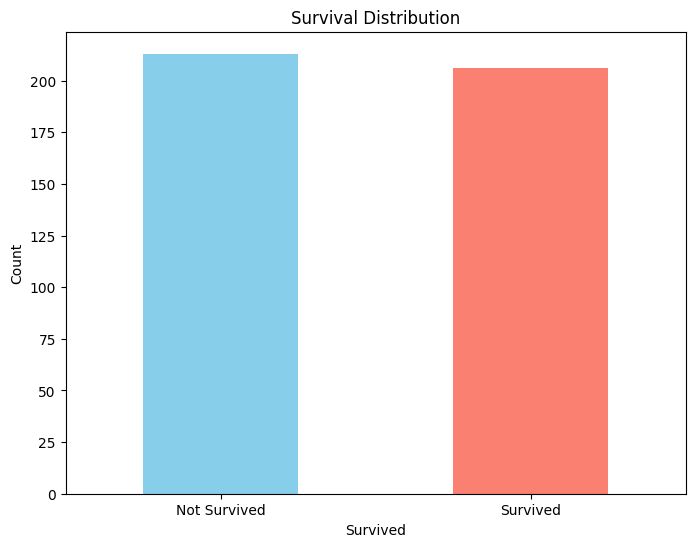

In [17]:
import matplotlib.pyplot as plt

# Plot the distribution of survival
plt.figure(figsize=(8, 6))
df['Survived'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'], rotation=0)
plt.show()

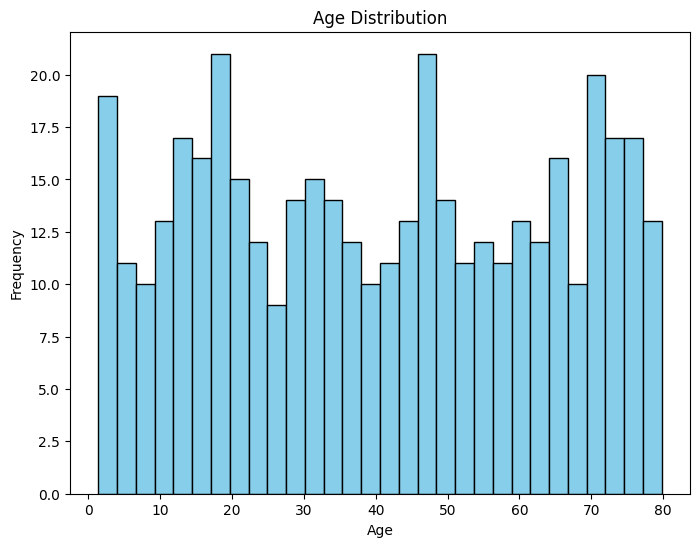

In [18]:
plt.figure(figsize=(8, 6))
df['Age'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

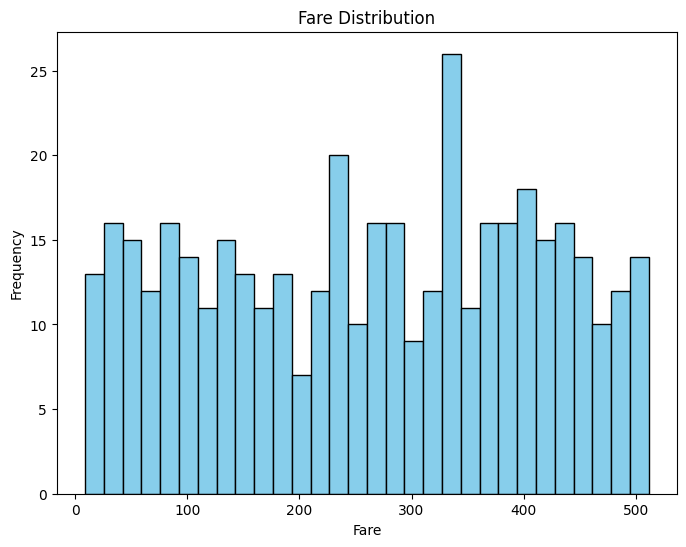

In [19]:
plt.figure(figsize=(8, 6))
df['Fare'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

<ipython-input-20-1a78bf636b2d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, palette='pastel')


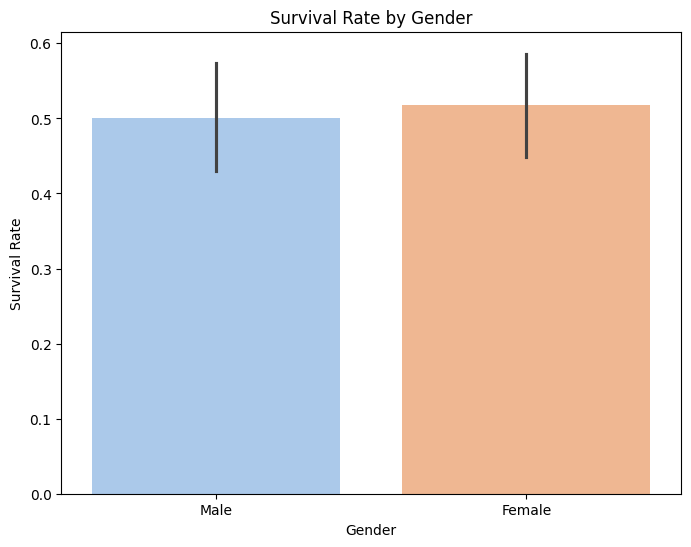

In [20]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=df, palette='pastel')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Encode 'Sex' and 'Embarked' columns
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [22]:
# Select features and target variable
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

In [23]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.47      0.45        40
           1       0.47      0.43      0.45        44

    accuracy                           0.45        84
   macro avg       0.45      0.45      0.45        84
weighted avg       0.45      0.45      0.45        84

[[19 21]
 [25 19]]


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best estimator to make predictions
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

# Evaluate the optimized model
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report for Optimized Model:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix for Optimized Model:\n", confusion_matrix(y_test, y_pred_best))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.5373134328358209
Classification Report for Optimized Model:
               precision    recall  f1-score   support

           0       0.37      0.42      0.40        40
           1       0.39      0.34      0.37        44

    accuracy                           0.38        84
   macro avg       0.38      0.38      0.38        84
weighted avg       0.38      0.38      0.38        84

Confusion Matrix for Optimized Model:
 [[17 23]
 [29 15]]


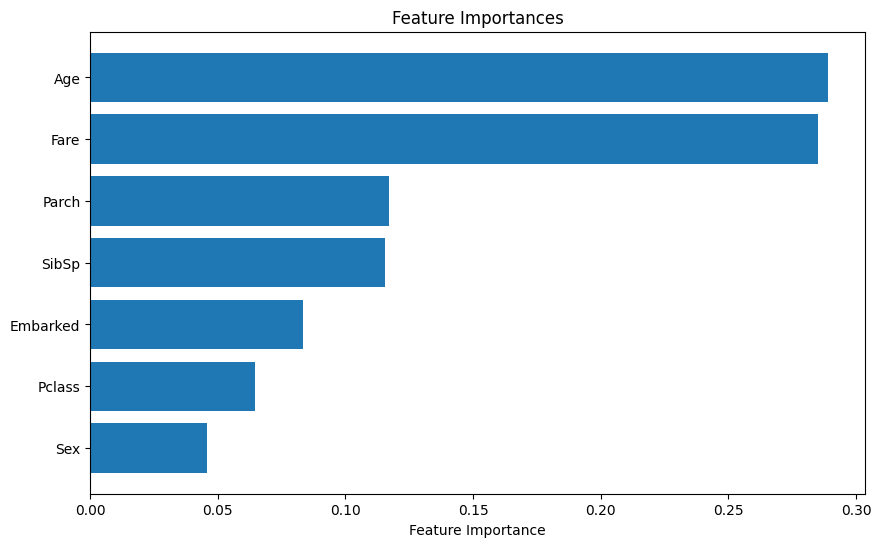

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the optimized model
importances = best_rf.feature_importances_
features = X.columns

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.yticks(range(X.shape[1]), features[indices])
plt.xlabel('Feature Importance')
plt.show()

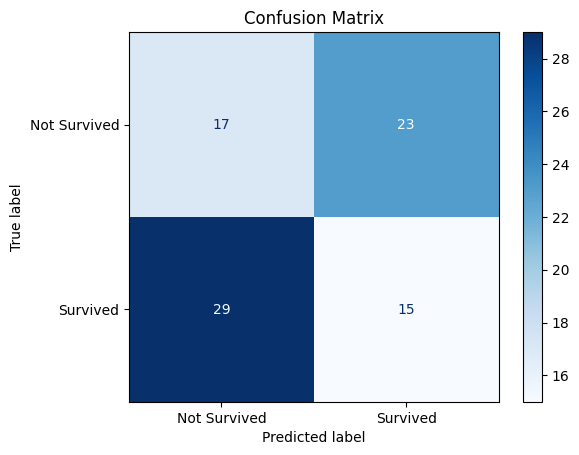

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_best), display_labels=['Not Survived', 'Survived']).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define and train the baseline model
model_baseline = RandomForestClassifier()
model_baseline.fit(X_train, y_train)

# Make predictions with the baseline model
y_pred_baseline = model_baseline.predict(X_test)

# Make predictions with the optimized model
y_pred_best = best_rf.predict(X_test)

# Calculate accuracy for baseline model
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)

# Calculate accuracy for optimized model
accuracy_best = accuracy_score(y_test, y_pred_best)

# Print model evaluation summary
print("Model Evaluation Summary:")
print(f"Accuracy of Baseline Model: {accuracy_baseline:.2f}")
print(f"Accuracy of Optimized Model: {accuracy_best:.2f}")

print("\nClassification Report for Baseline Model:")
print(classification_report(y_test, y_pred_baseline))

print("\nConfusion Matrix for Baseline Model:")
print(confusion_matrix(y_test, y_pred_baseline))

print("\nClassification Report for Optimized Model:")
print(classification_report(y_test, y_pred_best))

print("\nConfusion Matrix for Optimized Model:")
print(confusion_matrix(y_test, y_pred_best))

Model Evaluation Summary:
Accuracy of Baseline Model: 0.44
Accuracy of Optimized Model: 0.38

Classification Report for Baseline Model:
              precision    recall  f1-score   support

           0       0.42      0.47      0.45        40
           1       0.46      0.41      0.43        44

    accuracy                           0.44        84
   macro avg       0.44      0.44      0.44        84
weighted avg       0.44      0.44      0.44        84


Confusion Matrix for Baseline Model:
[[19 21]
 [26 18]]

Classification Report for Optimized Model:
              precision    recall  f1-score   support

           0       0.37      0.42      0.40        40
           1       0.39      0.34      0.37        44

    accuracy                           0.38        84
   macro avg       0.38      0.38      0.38        84
weighted avg       0.38      0.38      0.38        84


Confusion Matrix for Optimized Model:
[[17 23]
 [29 15]]
